## 1. Data Collection & Understanding

### 1.1 Libraries and Data Import 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import datetime as dt
import mysql.connector
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="520i3i4ThlH<3H",
  database="tradingbehaviour"
)

#For Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer

#For clustering algorithm
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 200)
np.set_printoptions(threshold=sys.maxsize)

df = pd.read_csv("data_raw.csv")

### 1.2 Data Understanding

In [3]:
# Understand data columns and type of attributes
## In total 177132 rows and 15 columns
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177132 entries, 0 to 177131
Data columns (total 15 columns):
millis         177132 non-null object
datetime       177132 non-null object
QdfTime        177132 non-null object
OpenTime       177132 non-null object
Client         177132 non-null object
Amount         177132 non-null int64
Sign           177132 non-null int64
Symbol         177132 non-null object
OrderId        177132 non-null object
OpenPrice      177132 non-null float64
CloseTime      177132 non-null object
ClosePrice     177132 non-null float64
MinsInTrade    177132 non-null float64
Server         177132 non-null object
CsvUid         177132 non-null int64
dtypes: float64(3), int64(3), object(9)
memory usage: 20.3+ MB


,millis,datetime,QdfTime,OpenTime,Client,Amount,Sign,Symbol,OrderId,OpenPrice,CloseTime,ClosePrice,MinsInTrade,Server,CsvUid
count,177132,177132,177132,177132,177132,177132.000000,177132.000000,177132,177132,177132.000000,177132,177132.000000,177132.000000,177132,177132.000000
unique,147270,171310,147270,171310,684,NaN,NaN,30,177132,NaN,129310,NaN,NaN,1,NaN
top,19/01/2017 10:40:11,2017.01.26T06:47:18.773,01/19/2017 10:40:11,2017.01.26T06:47:18.773,B1361,NaN,NaN,USD/CHF,B785_2656,NaN,2017.02.02T00:00:00.000,NaN,NaN,Client,NaN
freq,42,37,42,37,6939,NaN,NaN,8407,1,NaN,19775,NaN,NaN,177132,NaN
mean,NaN,NaN,NaN,NaN,NaN,3056.714072,-0.015457,NaN,NaN,29.616512,NaN,29.624111,3212.165498,NaN,88566.500000
std,NaN,NaN,NaN,NaN,NaN,7037.204354,0.999883,NaN,NaN,48.010968,NaN,48.026786,6694.618127,NaN,51133.748278
min,NaN,NaN,NaN,NaN,NaN,-784.000000,-1.000000,NaN,NaN,0.688888,NaN,0.689305,0.019100,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,1000.000000,-1.000000,NaN,NaN,1.000422,NaN,0.998756,0.570783,NaN,44283.750000
50%,NaN,NaN,NaN,NaN,NaN,1000.000000,-1.000000,NaN,NaN,1.393673,NaN,1.394299,75.911192,NaN,88566.500000
75%,NaN,NaN,NaN,NaN,NaN,2856.250000,1.000000,NaN,NaN,81.481915,NaN,81.622710,2949.766200,NaN,132849.250000


In [4]:
# check if any column have missing value
df.isna().sum()

millis         0
datetime       0
QdfTime        0
OpenTime       0
Client         0
Amount         0
Sign           0
Symbol         0
OrderId        0
OpenPrice      0
CloseTime      0
ClosePrice     0
MinsInTrade    0
Server         0
CsvUid         0
dtype: int64

## 2. Data Pre-processing
### 2.1 Data Cleaning and Transformation

In [5]:
#Rename column names
df.rename(columns={'Client':'Customer'},inplace=True)

In [6]:
## drop unnecessary columns that are duplicate and do not contain meaningful value for analysis
df1 = df.drop(['millis', 'datetime','QdfTime','Server','CsvUid'], axis='columns')

1000      56529
2000      10975
3000       5034
4000       2590
5000       1460
6000        935
7000        640
8000        504
0           437
412         393
2           379
13          372
183         364
185         357
9000        336
222         315
18          303
905         296
130         288
664         281
10000       271
220         245
66          231
618         230
458         223
204         219
200         213
27          213
134         212
20          205
5           201
178         198
484         193
11000       192
375         189
314         182
503         178
240         178
12000       176
259         176
156         175
333         171
741         170
494         168
1976        166
208         165
201         165
731         162
278         161
230         158
164         157
345         156
231         154
377         153
13000       153
265         153
19          153
322         150
453         149
143         148
492         148
8           143
408     

<AxesSubplot:xlabel='Amount'>

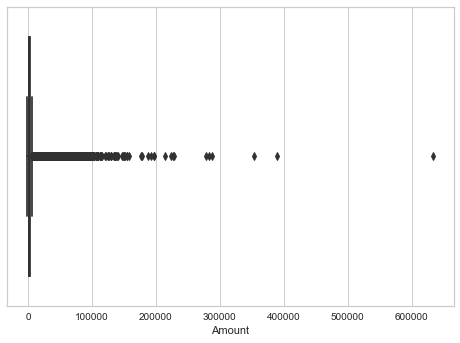

In [7]:
#To further check on validity of "Amount" columns as it contains negative value -784 
print(df["Amount"].value_counts())
sns.boxplot(x=df["Amount"])

In [8]:
## Since the Amount columns contains lots of outlier such as negative and 0 values as well as negative value
# "Amount" column will be dropped out to avoid bias and replace with Profit&Losses with pips
df1 = df1.drop(['Amount'], axis='columns')

#To determine the profit and losses of the trade
df1['PnL']= [z-y if x > 0 else y-z for x,y,z in zip(df['Sign'],df['OpenPrice'],df['ClosePrice'])]

#To standardize profit and losses into pips
df1['PnL_pips']= [y*10000 if x <20 else y*100 for x,y in zip(df['OpenPrice'],df1['PnL'])]

In [9]:
#Change OpenTime and CloseTime format from Object to datetime
df1['OpenTime']=df1['OpenTime'].apply(lambda x: dt.datetime.strptime(x, '%Y.%m.%dT%H:%M:%S.%f'))
df1['CloseTime']=df1['CloseTime'].apply(lambda x: dt.datetime.strptime(x, '%Y.%m.%dT%H:%M:%S.%f'))

#Split date and time into different colummns
df1['OpenDate']=df1['OpenTime'].apply(lambda x: dt.datetime.strftime(x, '%Y.%m.%d'))
df1['CloseDate']=df1['CloseTime'].apply(lambda x: dt.datetime.strftime(x, '%Y.%m.%d'))

#Split open and close month, day and time into different colummns for features engineer
df1['OpenMonth']=df1['OpenTime'].apply(lambda x: dt.datetime.strftime(x, '%m')).astype(float)
df1['OpenDay']=df1['OpenTime'].apply(lambda x: dt.datetime.strftime(x, '%d')).astype(float)
df1['OpenHour']=df1['OpenTime'].apply(lambda x: dt.datetime.strftime(x, '%H')).astype(float)

df1['CloseMonth']=df1['CloseTime'].apply(lambda x: dt.datetime.strftime(x, '%m')).astype(float)
df1['CloseDay']=df1['CloseTime'].apply(lambda x: dt.datetime.strftime(x, '%d')).astype(float)
df1['CloseHour']=df1['CloseTime'].apply(lambda x: dt.datetime.strftime(x, '%H')).astype(float)

In [10]:
# To count total trading days for RFM  
print(df1["OpenDate"].nunique())
print(df1["CloseDate"].nunique())

27
28


### 2.2 Exploratory Data Analysis (EDA)

In [11]:
df1.info()
df1.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177132 entries, 0 to 177131
Data columns (total 19 columns):
OpenTime       177132 non-null datetime64[ns]
Customer       177132 non-null object
Sign           177132 non-null int64
Symbol         177132 non-null object
OrderId        177132 non-null object
OpenPrice      177132 non-null float64
CloseTime      177132 non-null datetime64[ns]
ClosePrice     177132 non-null float64
MinsInTrade    177132 non-null float64
PnL            177132 non-null float64
PnL_pips       177132 non-null float64
OpenDate       177132 non-null object
CloseDate      177132 non-null object
OpenMonth      177132 non-null float64
OpenDay        177132 non-null float64
OpenHour       177132 non-null float64
CloseMonth     177132 non-null float64
CloseDay       177132 non-null float64
CloseHour      177132 non-null float64
dtypes: datetime64[ns](2), float64(11), int64(1), object(5)
memory usage: 25.7+ MB


,OpenTime,Customer,Sign,Symbol,OrderId,OpenPrice,CloseTime,ClosePrice,MinsInTrade,PnL,PnL_pips,OpenDate,CloseDate,OpenMonth,OpenDay,OpenHour,CloseMonth,CloseDay,CloseHour
count,177132,177132,177132.000000,177132,177132,177132.000000,177132,177132.000000,177132.000000,177132.000000,177132.000000,177132,177132,177132.000000,177132.000000,177132.000000,177132.000000,177132.000000,177132.000000
unique,171310,684,NaN,30,177132,NaN,129310,NaN,NaN,NaN,NaN,27,28,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-01-26 06:47:18.773000,B1361,NaN,USD/CHF,B785_2656,NaN,2017-02-02 00:00:00,NaN,NaN,NaN,NaN,2017.01.17,2017.02.02,NaN,NaN,NaN,NaN,NaN,NaN
freq,37,6939,NaN,8407,1,NaN,19775,NaN,NaN,NaN,NaN,11223,19775,NaN,NaN,NaN,NaN,NaN,NaN
first,2017-01-02 14:32:01.992000,NaN,NaN,NaN,NaN,NaN,2017-01-02 15:44:23.693000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-02-01 23:53:15.557000,NaN,NaN,NaN,NaN,NaN,2017-02-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-0.015457,NaN,NaN,29.616512,NaN,29.624111,3212.165498,-0.009496,-10.791716,NaN,NaN,1.049912,17.123247,6.844128,1.171019,15.625596,6.267823
std,NaN,NaN,0.999883,NaN,NaN,48.010968,NaN,48.026786,6694.618127,0.378194,142.970800,NaN,NaN,0.217764,8.327719,5.293599,0.376527,9.388004,5.520603
min,NaN,NaN,-1.000000,NaN,NaN,0.688888,NaN,0.689305,0.019100,-7.392637,-4327.420311,NaN,NaN,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,NaN,NaN,-1.000000,NaN,NaN,1.000422,NaN,0.998756,0.570783,-0.001862,-12.972595,NaN,NaN,1.000000,11.000000,2.000000,1.000000,9.000000,1.000000


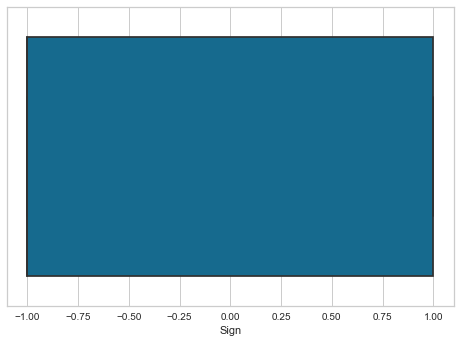

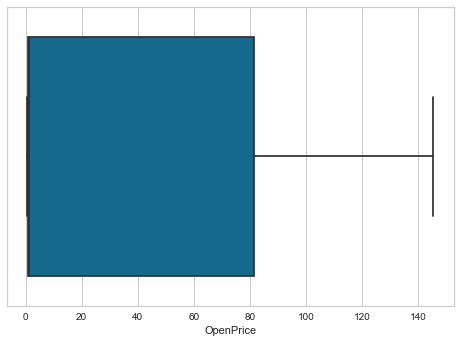

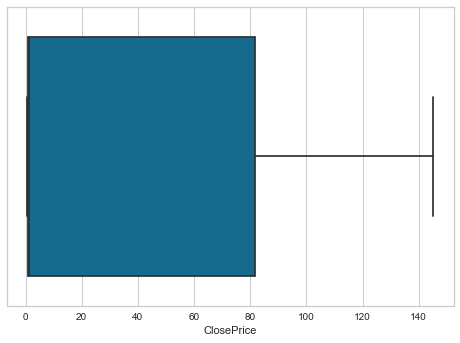

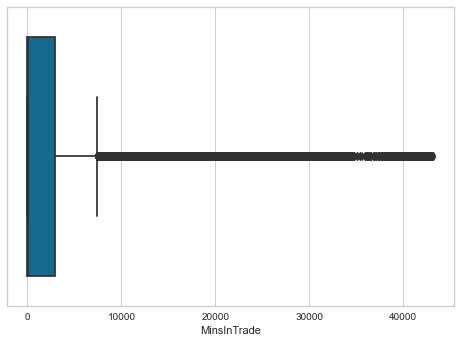

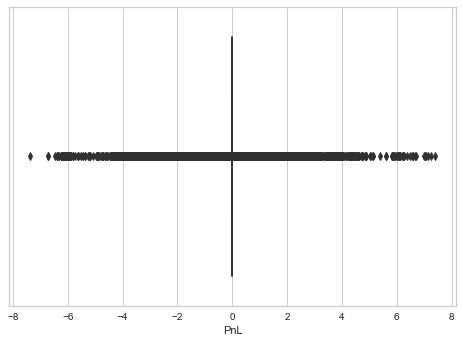

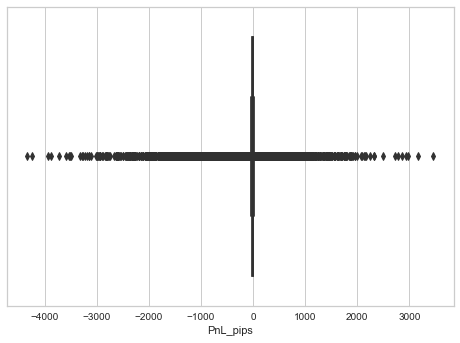

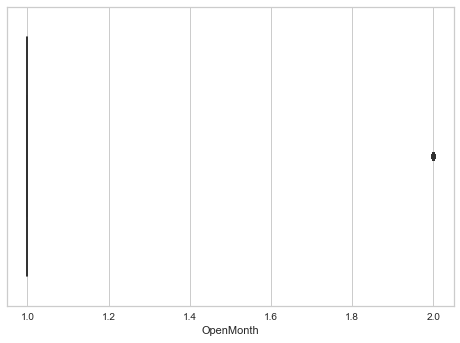

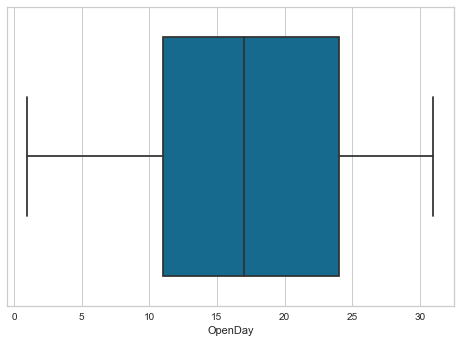

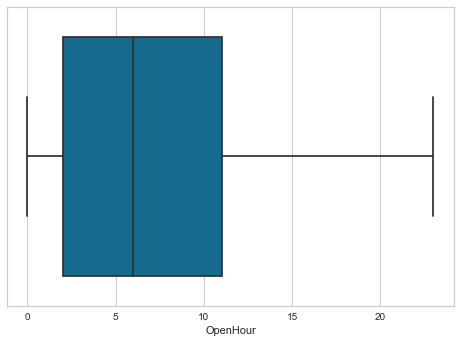

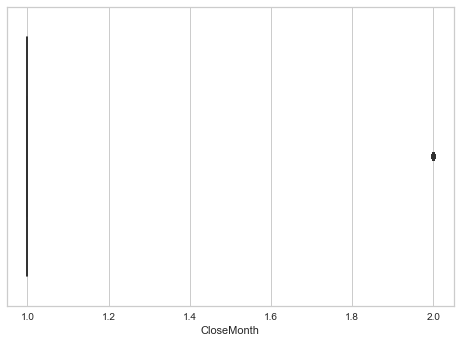

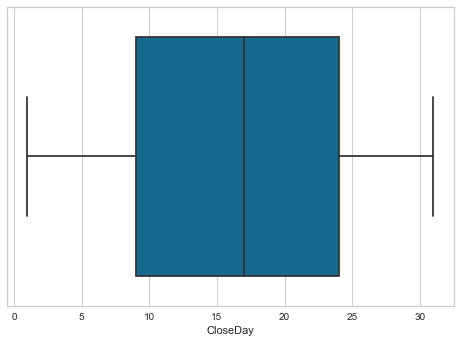

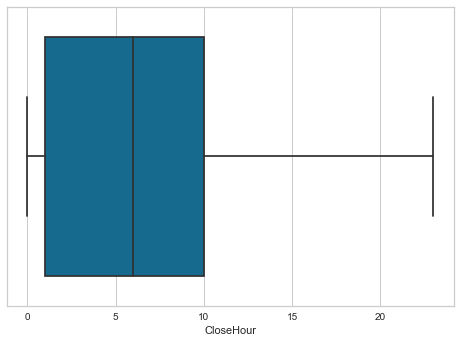

In [12]:
## boxplot to see the distribution of the columns
for x in df1.select_dtypes(np.number).columns:
    sns.boxplot(x=df1[x])
    plt.show()

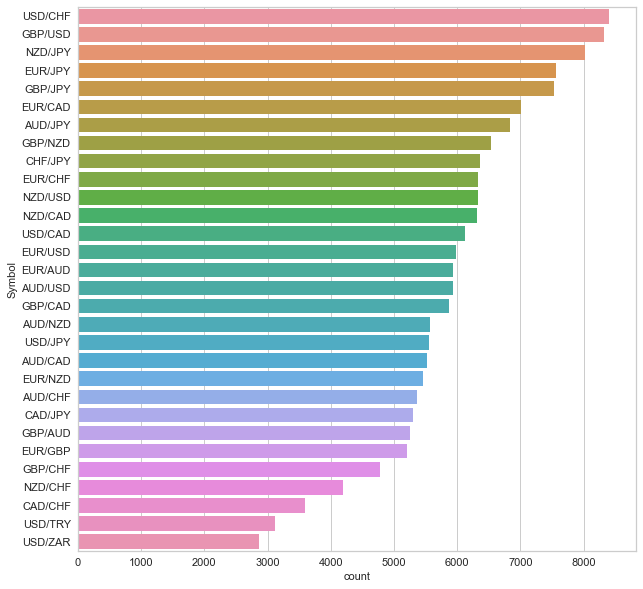

In [13]:
a4_dims = (10,10)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(size=11)
plt.yticks(size=11)
ax = sns.countplot(y="Symbol", data=df1,order = df1['Symbol'].value_counts().index)

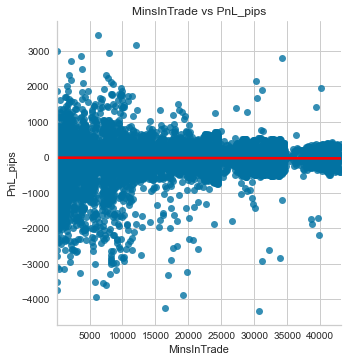

In [14]:
## To plot the regression line for MinsInTrade against P&L_pips
sns.lmplot(data = df1, x = 'MinsInTrade', y = 'PnL_pips', fit_reg = True,line_kws={'color': 'red'})
plt.title('MinsInTrade vs PnL_pips')
plt.show()

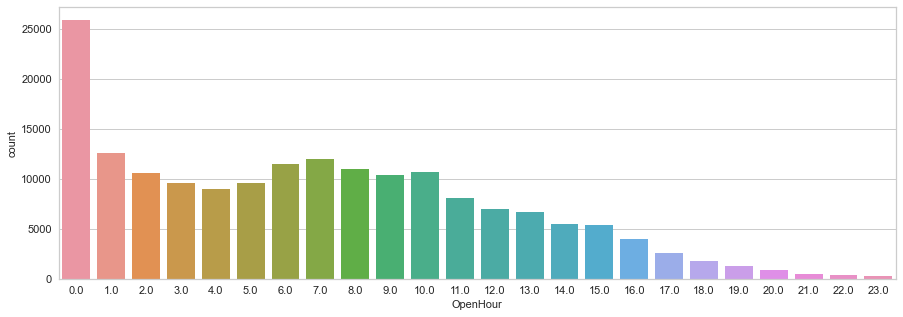

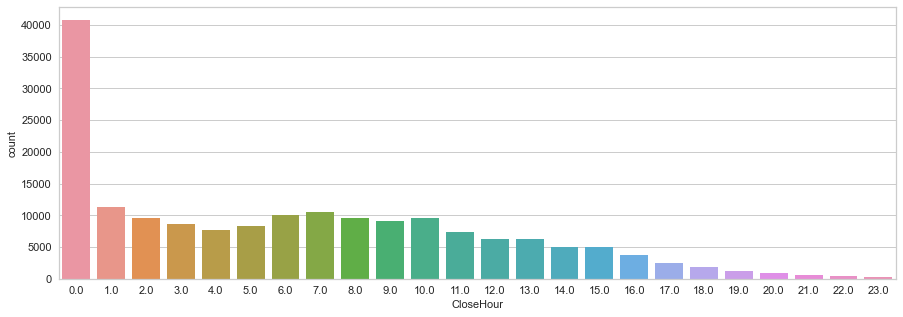

In [16]:
a4_dims = (15,5)
fig, bx = plt.subplots(figsize=a4_dims)
plt.xticks(size=11)
plt.yticks(size=11)
bx = sns.countplot(x="OpenHour", data=df1)

fig, cx = plt.subplots(figsize=a4_dims)
plt.xticks(size=11)
plt.yticks(size=11)
cx = sns.countplot(x="CloseHour", data=df1)

## 3. Features Engineering

### 3.1 Generate New Features

#### Trading Style/ Holding Period

In [18]:
#superscalping : 0-10mins
#scalping : 10-120mins
#daytrade : 120-3840mins
#swing : 3840-7200mins
#position : >7200mins

df1['I_Superscalping']= [1 if x < 10 else 0 for x in df1['MinsInTrade']]
df1['I_Scalping']= [1 if x >= 10 and x<120 else 0 for x in df1['MinsInTrade']]
df1['I_Daytrade']= [1 if x >= 120 and x<3840 else 0 for x in df1['MinsInTrade']]
df1['I_Swing']= [1 if x >= 3840 and x<7200 else 0 for x in df1['MinsInTrade']]
df1['I_Position']= [1 if x >= 7200 else 0 for x in df1['MinsInTrade']]

#### Trading Time

In [19]:
#Europe - 0700-1500
#US - 1500-2300
#Asia - 2300-0700

df1['I_Europe_Open']= [1 if x>=7 and x<15 else 0 for x in df1['OpenHour']]
df1['I_US_Open']= [1 if x>=15 and x<23 else 0 for x in df1['OpenHour']]
df1['I_Asia_Open']= [1 if x>=23 or x<7 else 0 for x in df1['OpenHour']]

df1['I_Europe_Close']= [1 if x>=7 and x<15 else 0 for x in df1['CloseHour']]
df1['I_US_Close']= [1 if x>=15 and x<23 else 0 for x in df1['CloseHour']]
df1['I_Asia_Close']= [1 if x>=23 or x<7 else 0 for x in df1['CloseHour']]

#### Trading Products

In [20]:
#Major Currencies : EUR/USD, USD/JPY, GBP/USD, USD/CHF, AUD/USD, USD/CAD, NZD/USD
#contribute significant amount of volume related to economic transactions, 
#heavily traded pairs for speculative purposes, lower spread
#Minor Currencies: Other than Major Currencies
Majorcurrencies = ['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD']

df1['I_Majorcurrency']= [1 if x in Majorcurrencies else 0 for x in df1['Symbol']]
df1['I_Minorcurrency']= [1 if x not in Majorcurrencies else 0 for x in df1['Symbol']]

In [22]:
writer=pd.ExcelWriter(r'C:\Users\willy\Desktop\Education\Master - Data Science (UM)\Sem3\WQD_7002_Data_Science_Research_Project\Data\data_pre_rfm.xlsx')
df1.to_excel(writer,sheet_name='df1', index = True)
writer.save()

### 3.2 Quantify behaviour using extended RFM model with MySQL

#### Export Quantified data after using MySQL

In [108]:
df2 = pd.read_csv("data_post_rfm.csv")

In [109]:
df3 = df2.drop(['customer'], axis='columns')
#identifying the columns with object (eg: 1,000 to 1000)
s = df3.select_dtypes(include='object').columns

# converting some of the columns to float64 for scaling purpose
df3[s] = df3[s].replace(",","",regex=True).astype('float')

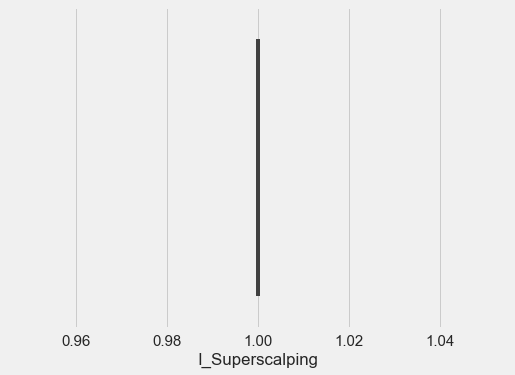

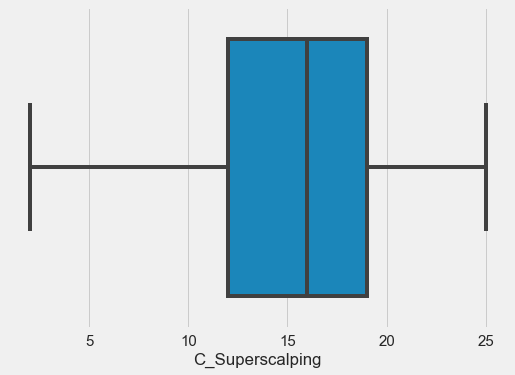

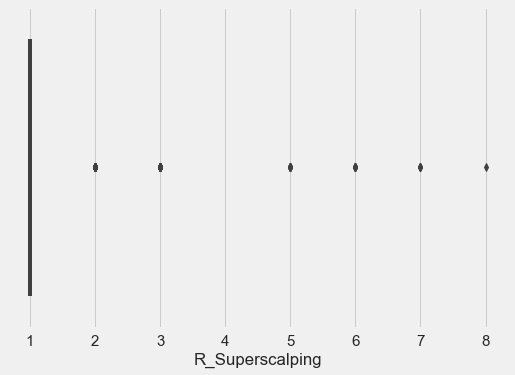

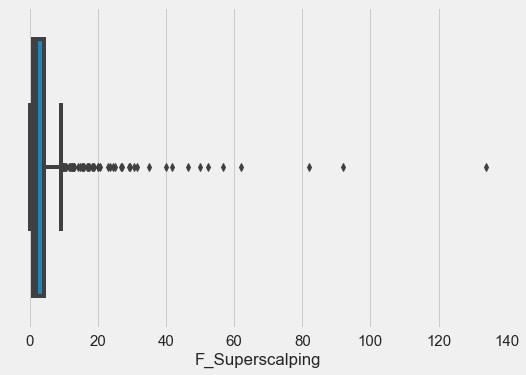

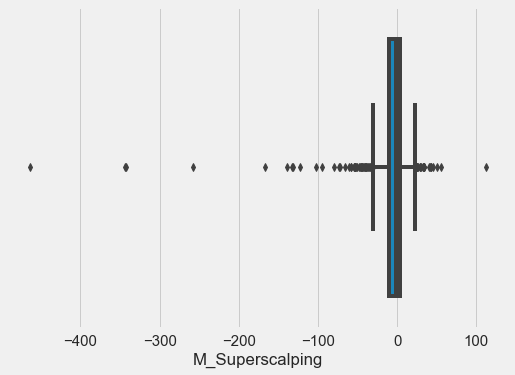

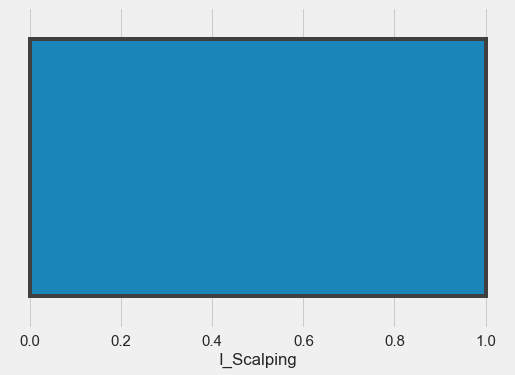

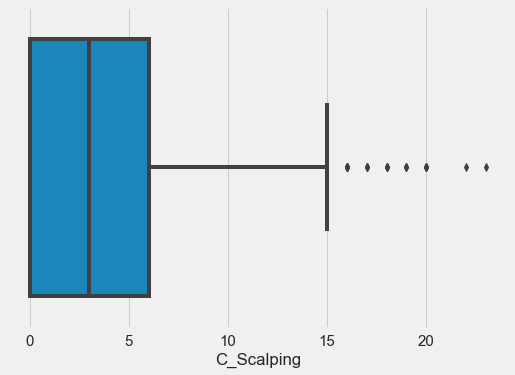

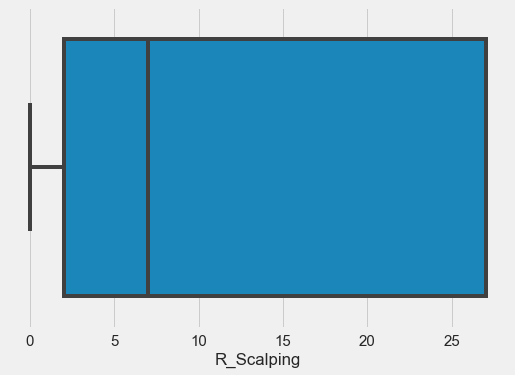

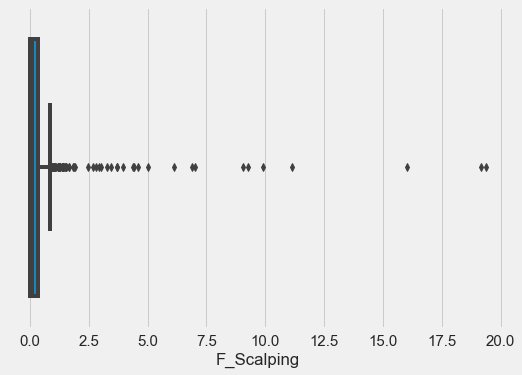

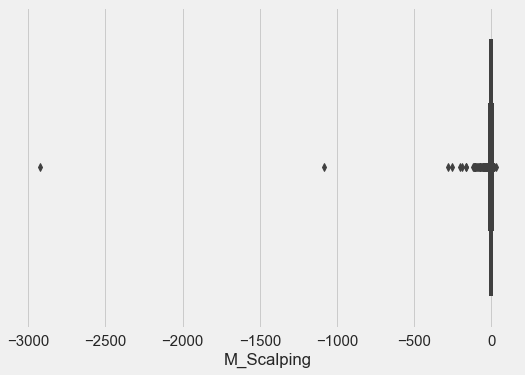

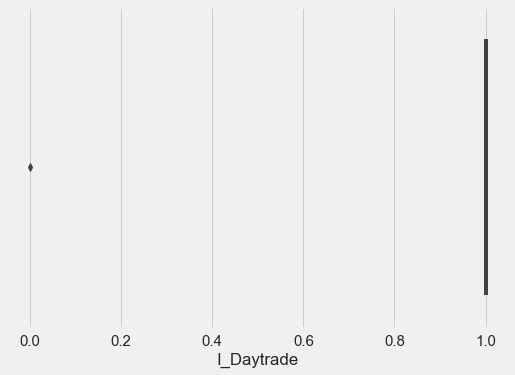

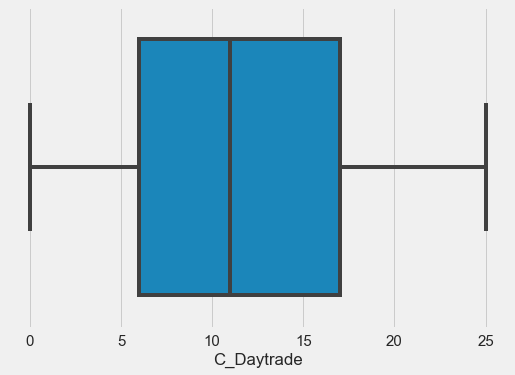

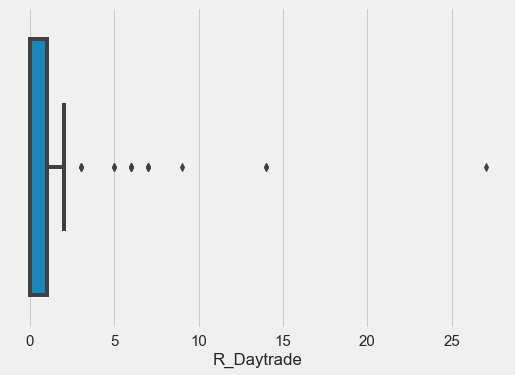

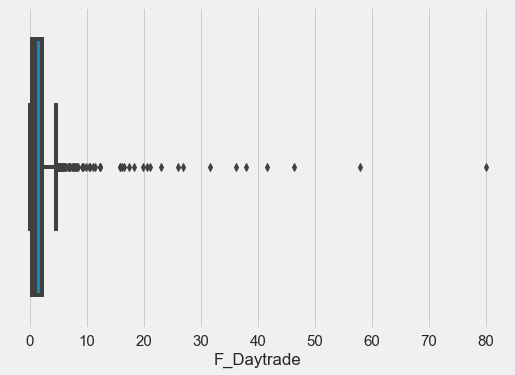

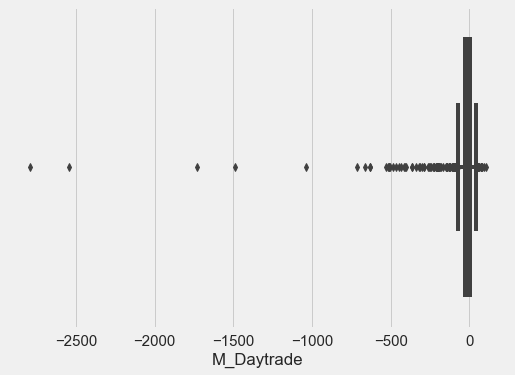

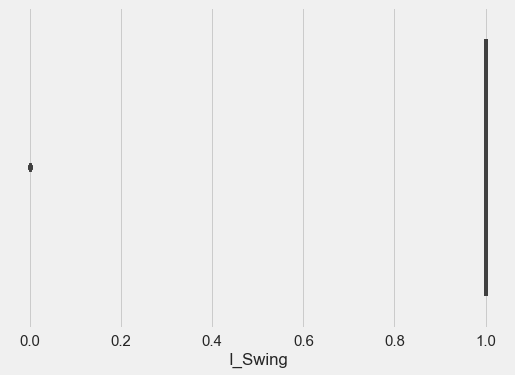

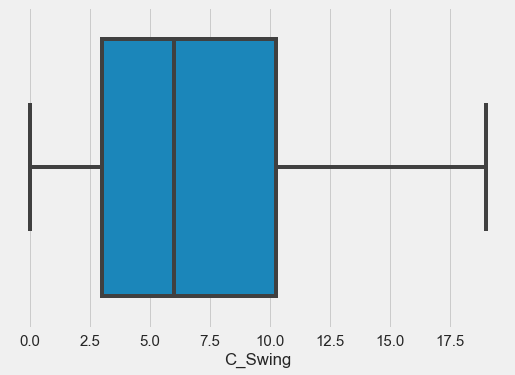

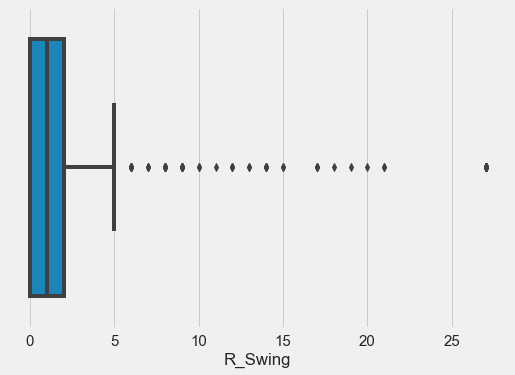

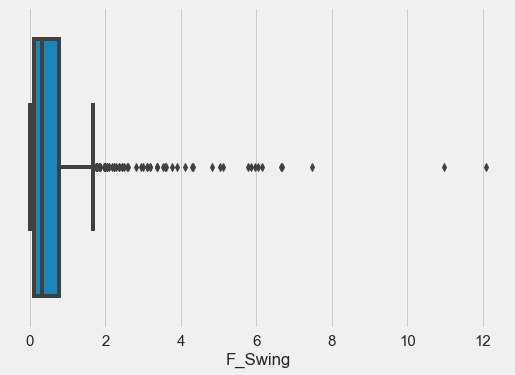

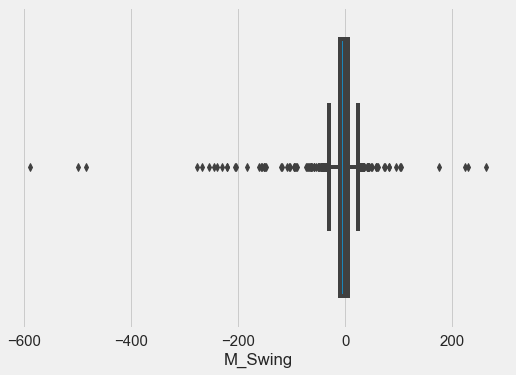

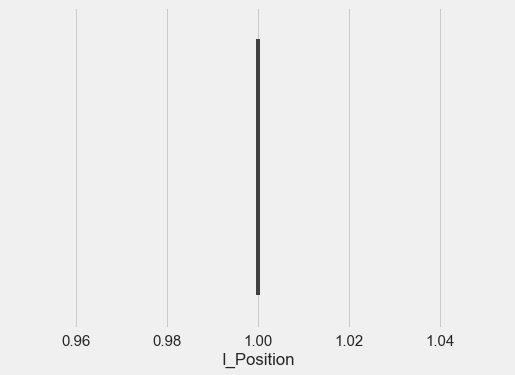

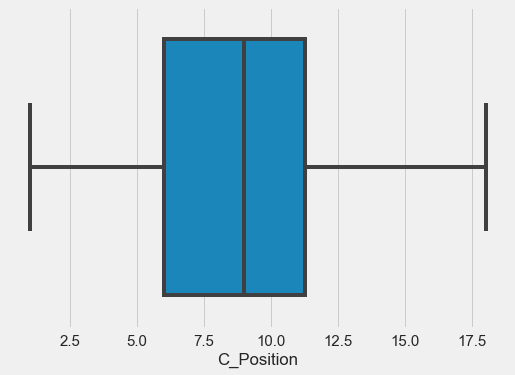

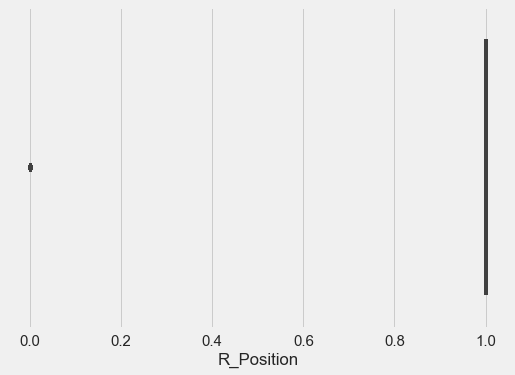

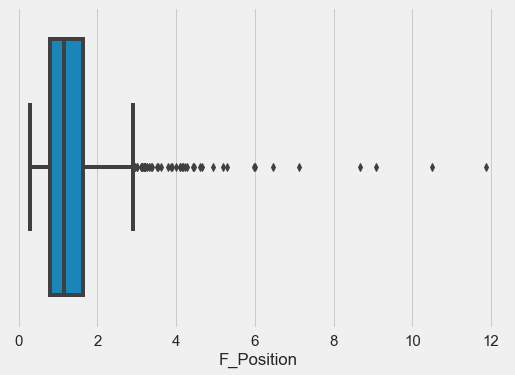

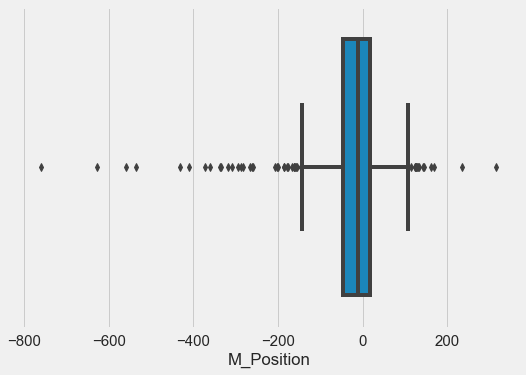

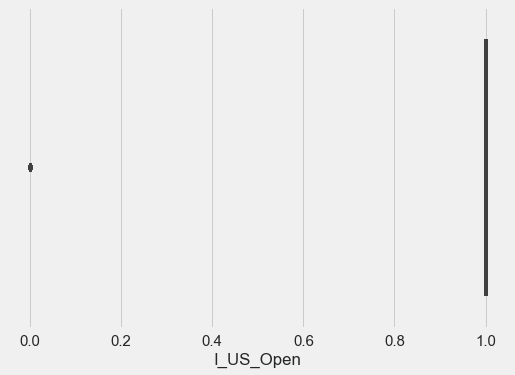

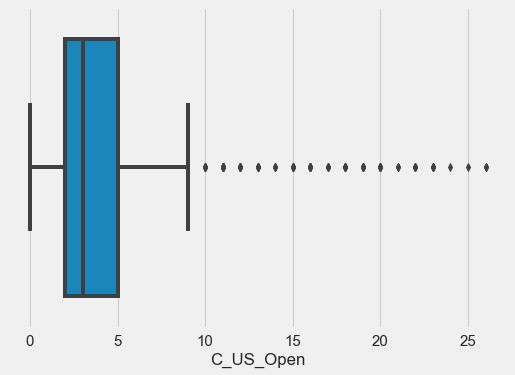

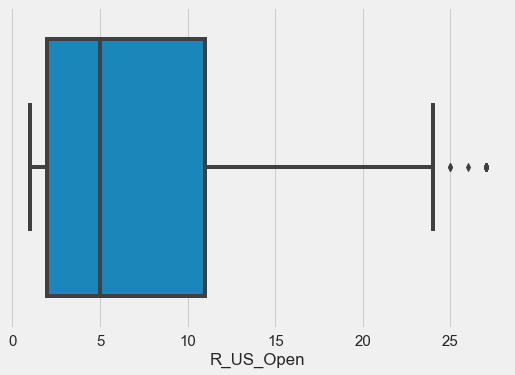

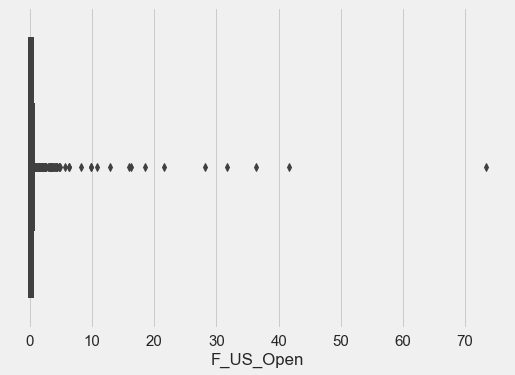

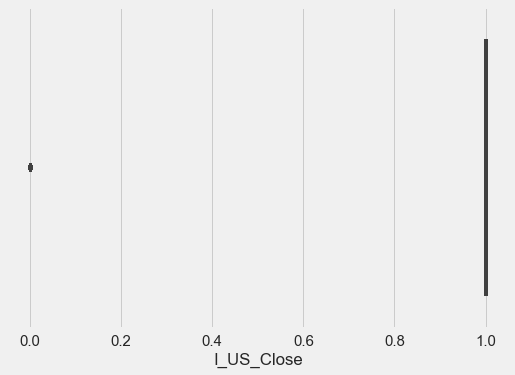

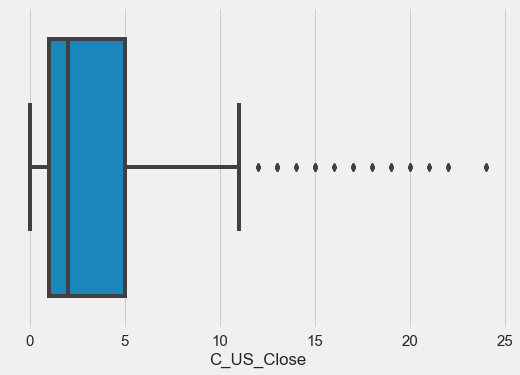

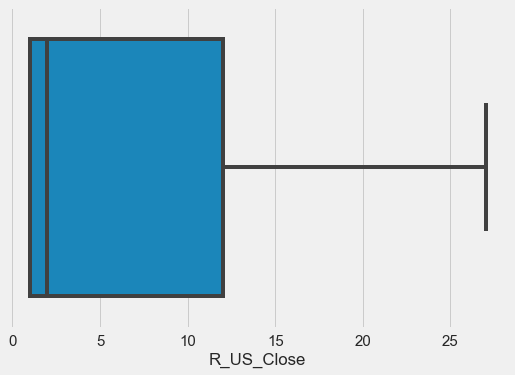

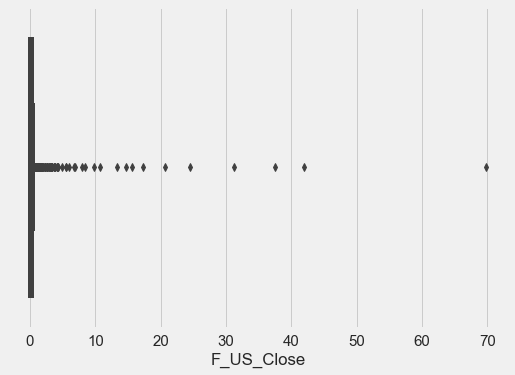

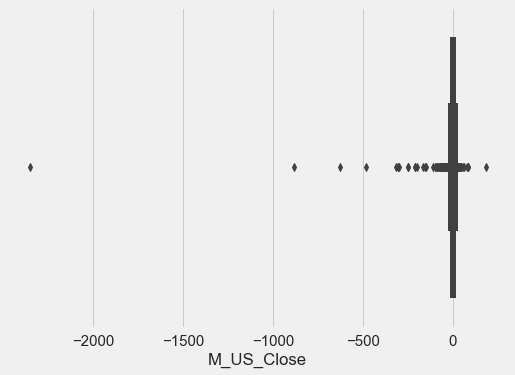

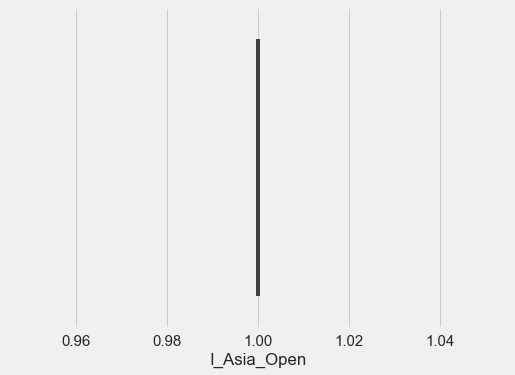

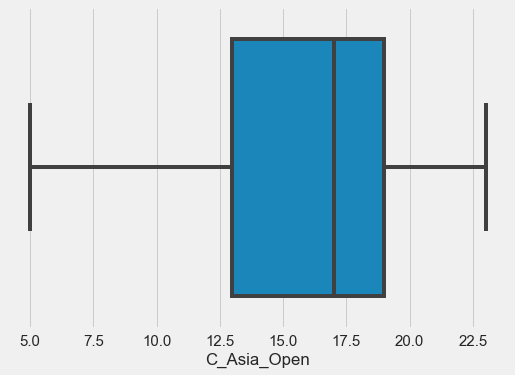

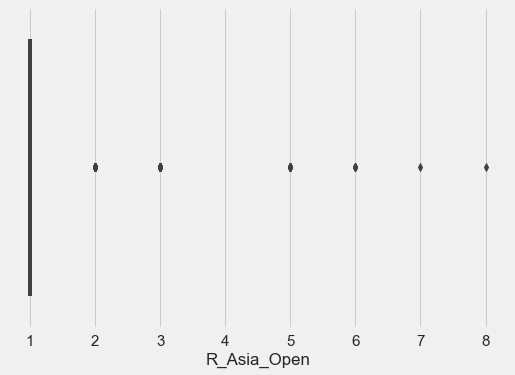

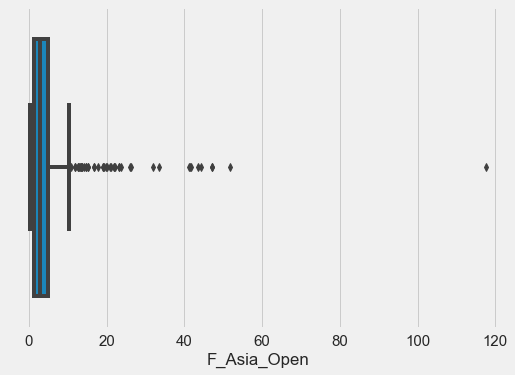

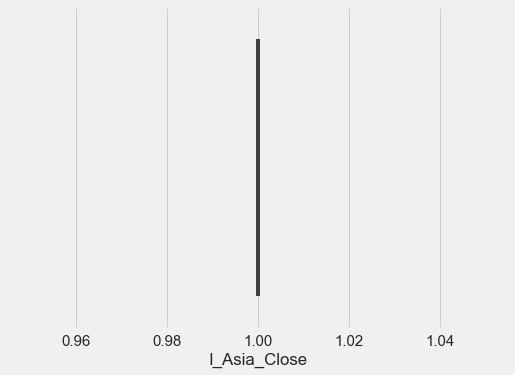

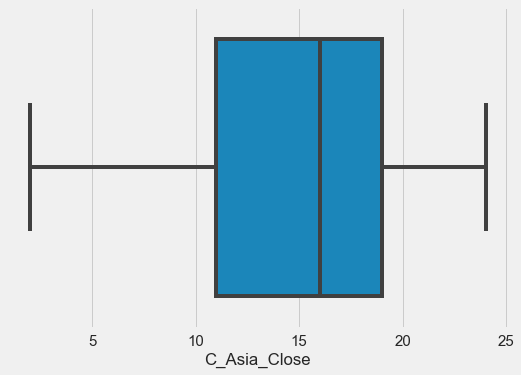

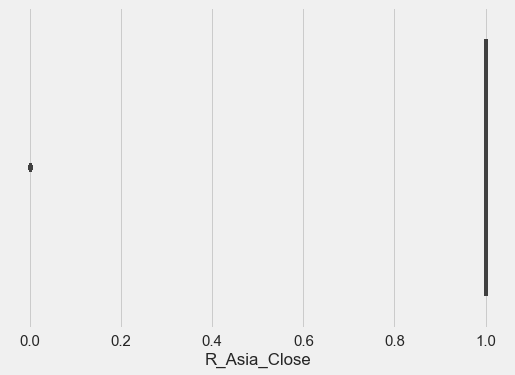

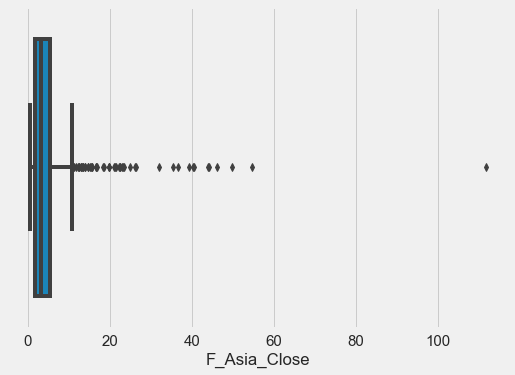

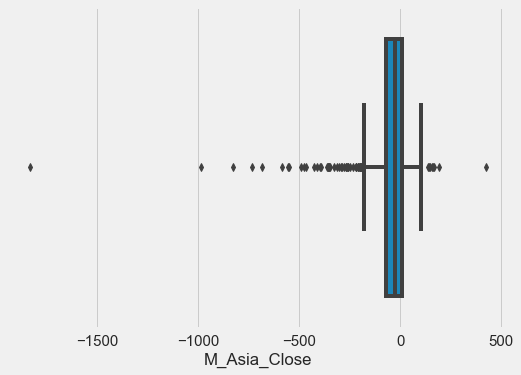

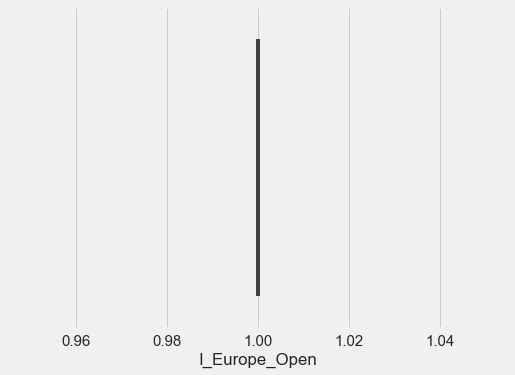

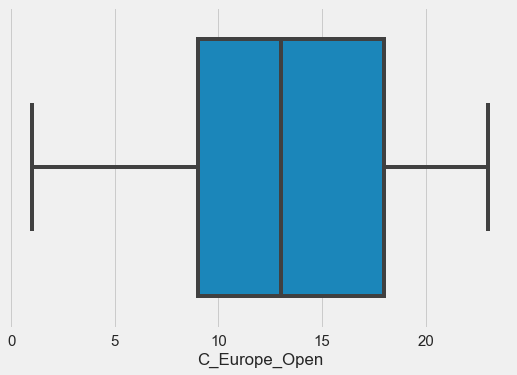

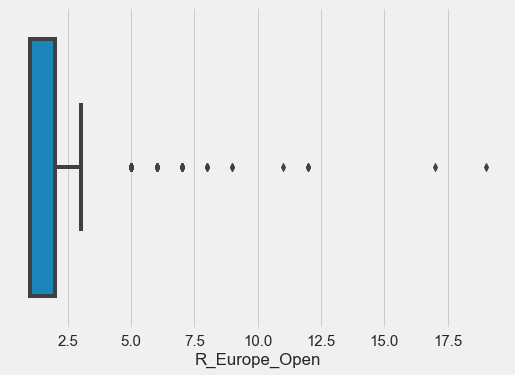

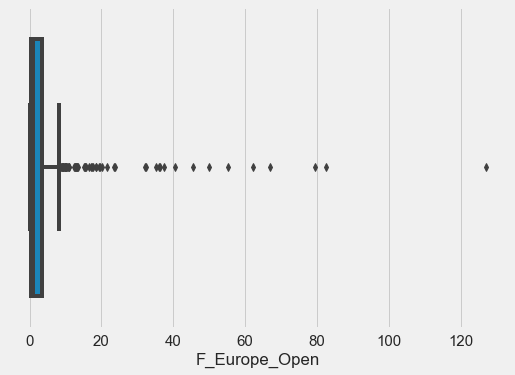

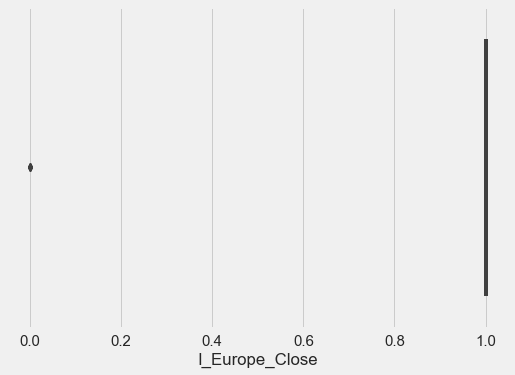

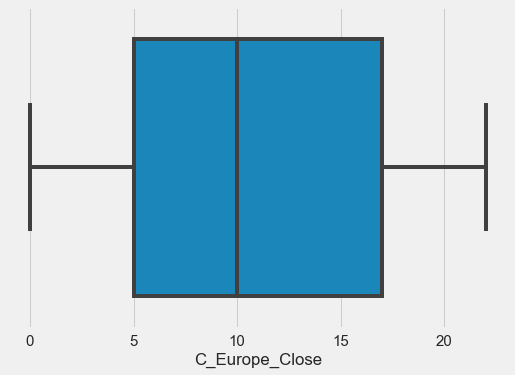

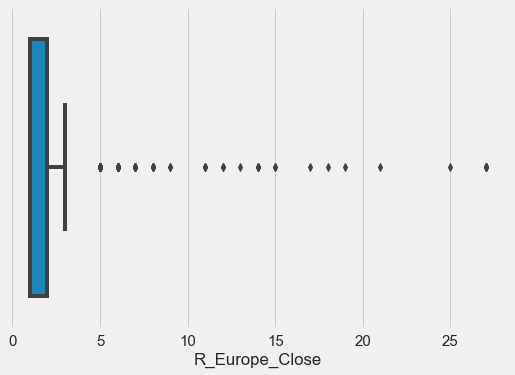

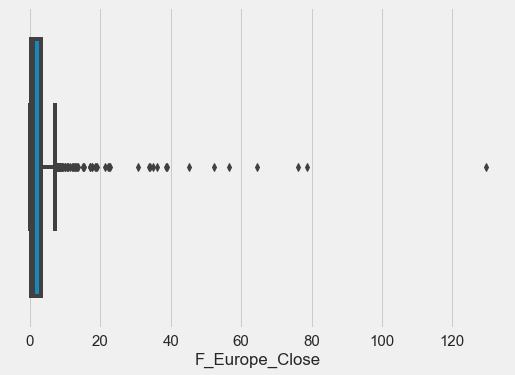

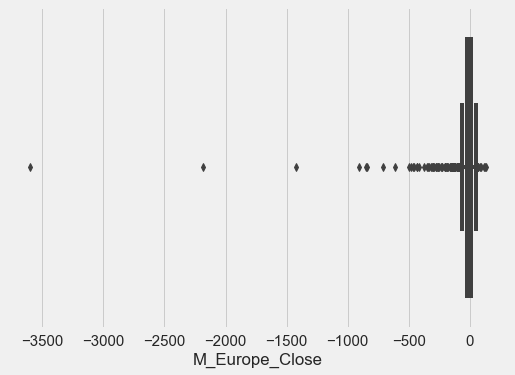

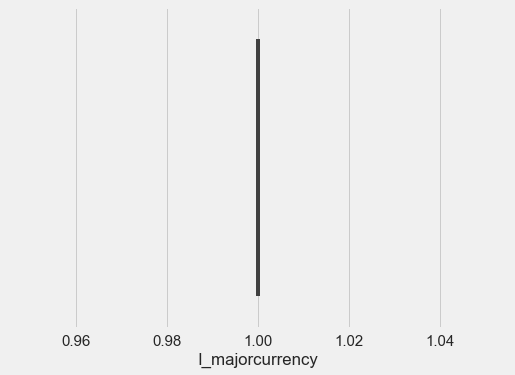

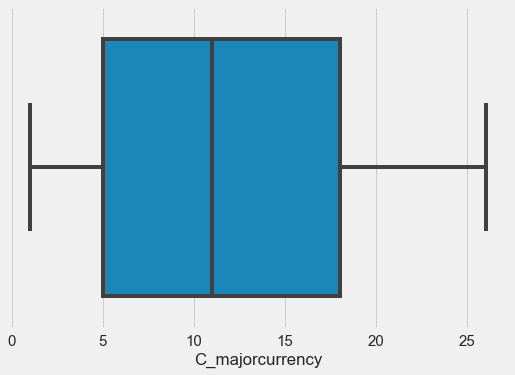

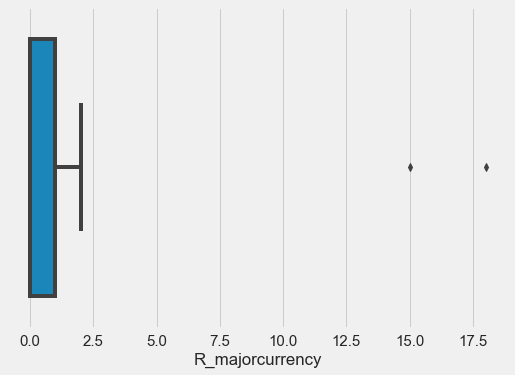

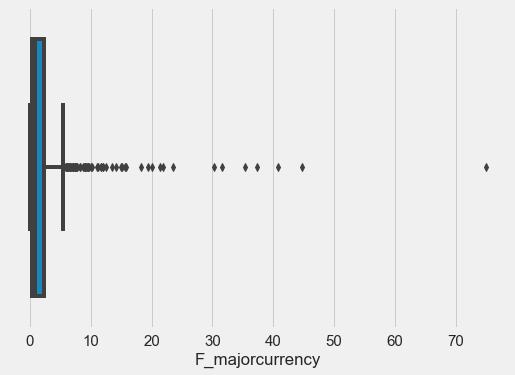

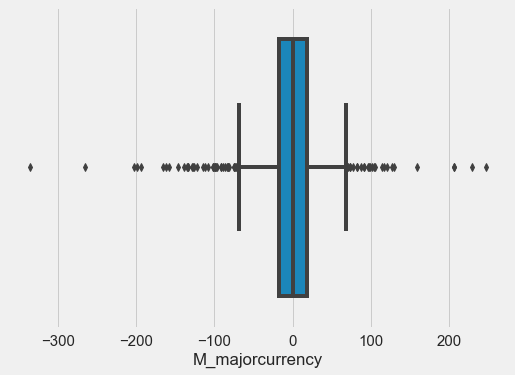

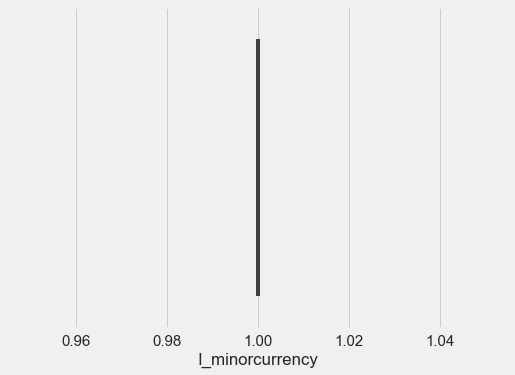

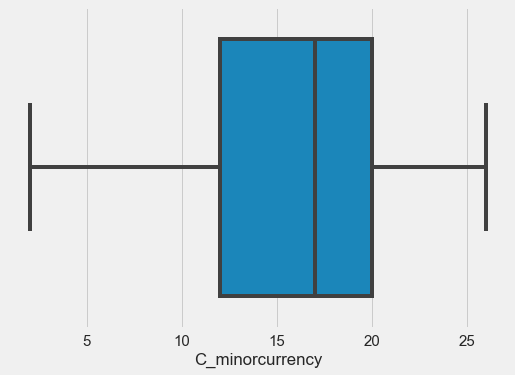

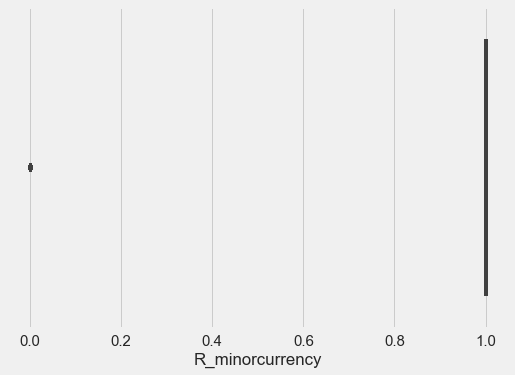

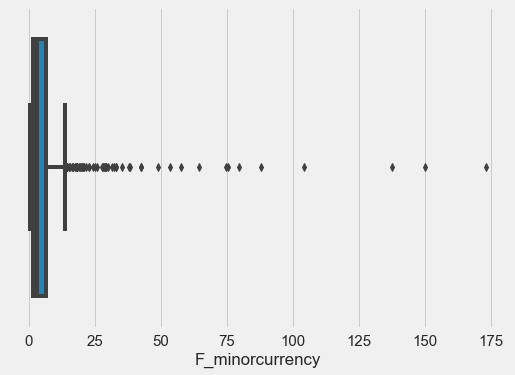

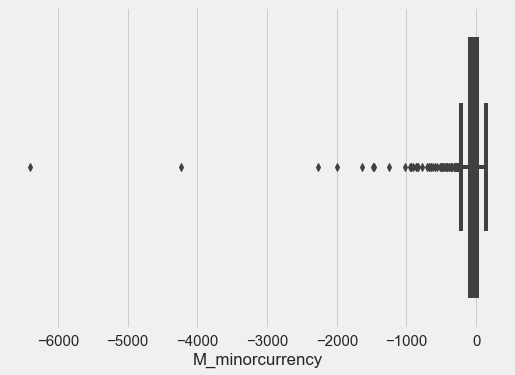

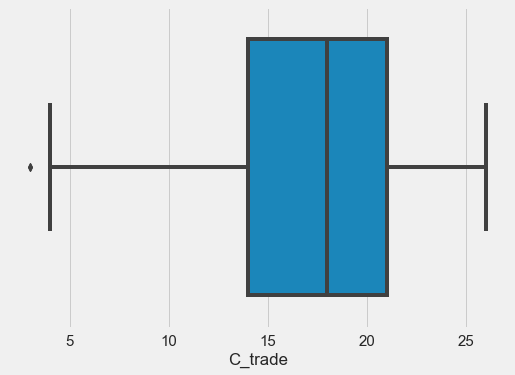

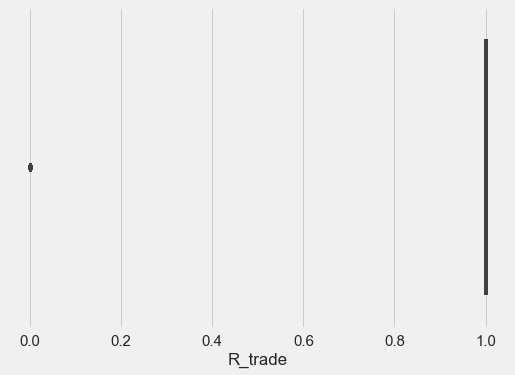

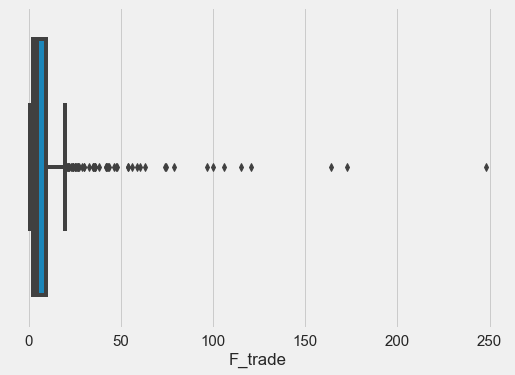

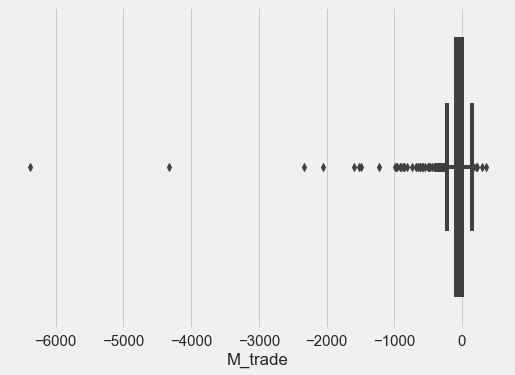

In [110]:
## boxplot to see the distribution of the columns
for x in df3.select_dtypes(np.number).columns:
    sns.boxplot(x=df3[x])
    plt.show()

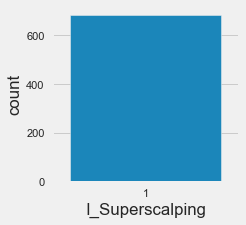

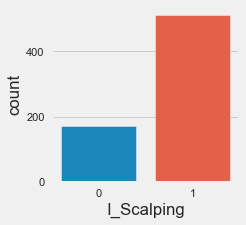

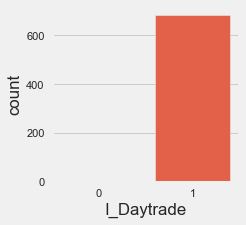

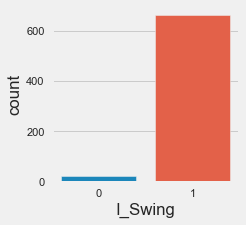

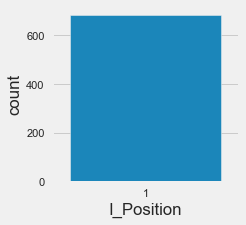

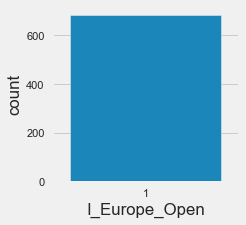

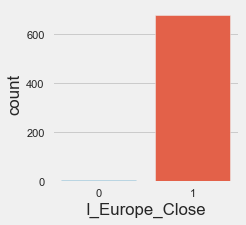

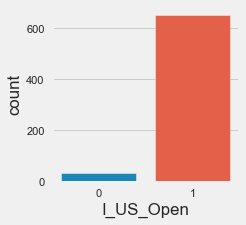

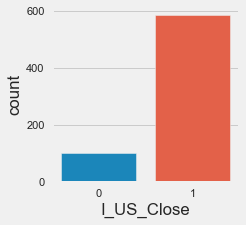

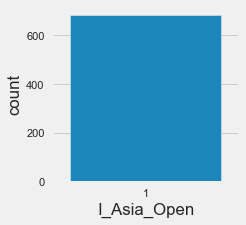

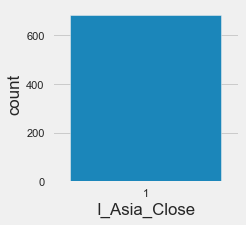

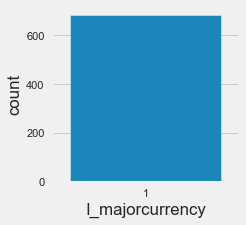

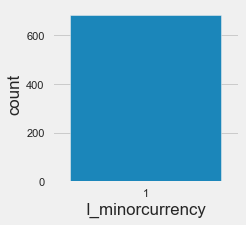

In [111]:
## Countplot to see the size of each columns
a4_dims = (3,3)
fig, bx = plt.subplots(figsize=a4_dims)
plt.xticks(size=11)
plt.yticks(size=11)
bx = sns.countplot(x="I_Superscalping", data=df3)
#-------------------------------------------------------------------------#
fig, cx = plt.subplots(figsize=a4_dims)
plt.xticks(size=11)
plt.yticks(size=11)
cx = sns.countplot(x="I_Scalping", data=df3)
#-------------------------------------------------------------------------#
fig, cx = plt.subplots(figsize=a4_dims)
plt.xticks(size=11)
plt.yticks(size=11)
cx = sns.countplot(x="I_Daytrade", data=df3)
#-------------------------------------------------------------------------#
fig, cx = plt.subplots(figsize=a4_dims)
plt.xticks(size=11)
plt.yticks(size=11)
cx = sns.countplot(x="I_Swing", data=df3)
#-------------------------------------------------------------------------#
fig, cx = plt.subplots(figsize=a4_dims)
plt.xticks(size=11)
plt.yticks(size=11)
cx = sns.countplot(x="I_Position", data=df3)
#-------------------------------------------------------------------------#
fig, cx = plt.subplots(figsize=a4_dims)
plt.xticks(size=11)
plt.yticks(size=11)
cx = sns.countplot(x="I_Europe_Open", data=df3)
#-------------------------------------------------------------------------#
fig, cx = plt.subplots(figsize=a4_dims)
plt.xticks(size=11)
plt.yticks(size=11)
cx = sns.countplot(x="I_Europe_Close", data=df3)
#-------------------------------------------------------------------------#
fig, cx = plt.subplots(figsize=a4_dims)
plt.xticks(size=11)
plt.yticks(size=11)
cx = sns.countplot(x="I_US_Open", data=df3)
#-------------------------------------------------------------------------#
fig, cx = plt.subplots(figsize=a4_dims)
plt.xticks(size=11)
plt.yticks(size=11)
cx = sns.countplot(x="I_US_Close", data=df3)
#-------------------------------------------------------------------------#
fig, cx = plt.subplots(figsize=a4_dims)
plt.xticks(size=11)
plt.yticks(size=11)
cx = sns.countplot(x="I_Asia_Open", data=df3)
#-------------------------------------------------------------------------#
fig, cx = plt.subplots(figsize=a4_dims)
plt.xticks(size=11)
plt.yticks(size=11)
cx = sns.countplot(x="I_Asia_Close", data=df3)
#-------------------------------------------------------------------------#
fig, cx = plt.subplots(figsize=a4_dims)
plt.xticks(size=11)
plt.yticks(size=11)
cx = sns.countplot(x="I_majorcurrency", data=df3)
#-------------------------------------------------------------------------#
fig, cx = plt.subplots(figsize=a4_dims)
plt.xticks(size=11)
plt.yticks(size=11)
cx = sns.countplot(x="I_minorcurrency", data=df3)

#### Remove necessary columns for clustering analysis

In [112]:
## Since I columns are mostly skewed to one side, it is better to remove to avoid biasness
df3 = df2.drop(['customer','I_Superscalping','I_Scalping','I_Daytrade','I_Swing','I_Position','I_Europe_Open'
               ,'I_Europe_Close','I_US_Open','I_US_Close','I_Asia_Open','I_Asia_Close'
               ,'I_majorcurrency','I_minorcurrency'], axis='columns')
# converting some of the columns to float64 for scaling purpose
df3[s] = df3[s].replace(",","",regex=True).astype('float')

### 3.3 Data Normalization

Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler.

Power Transformer applies a power transformation to each feature to make the data more Gaussian-like in order to stabilize variance and minimize skewness.
The Power Transformer actually automates this decision making by introducing a parameter called lambda. It decides on a generalized power transform by finding the best value of lambda using either the:
1. Box-Cox transform(works with only positive values)
2. The Yeo-Johnson transform(works with both positive and negative values)

In [113]:
for c in df3.select_dtypes(exclude='object').columns:
    pt = PowerTransformer(method = 'yeo-johnson')
    df3[c] =  pt.fit_transform(np.array(df3[c]).reshape(-1, 1))

## 4. Clustering Analysis

### 4.1 K-Means Clustering with Elbow method

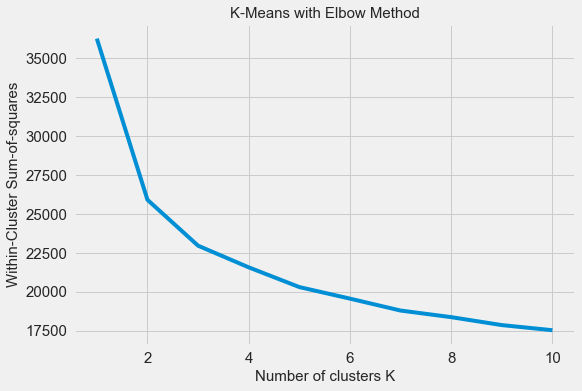

In [114]:
## Elbow method to identify optimal number of clusters
wb2=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=500,n_init=10,random_state=42)
    kmeans.fit(df3)
    wb2.append(kmeans.inertia_)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.plot(range(1,11),wb2,marker='x')
plt.title('K-Means with Elbow Method',fontsize=15)
plt.xlabel("Number of clusters K",fontsize=15)
plt.ylabel("Within-Cluster Sum-of-squares",fontsize=15)
plt.show()

In [115]:
kmeans2=KMeans(n_clusters=2,init='k-means++',max_iter=500,n_init=10,random_state=42)
cluster_kmeans_2=kmeans2.fit_predict(df3)

kmeans3=KMeans(n_clusters=3,init='k-means++',max_iter=500,n_init=10,random_state=42)
cluster_kmeans_3=kmeans3.fit_predict(df3)

In [116]:
print(pd.Series(cluster_kmeans_2).value_counts())
print(pd.Series(cluster_kmeans_3).value_counts())

1    349
0    335
dtype: int64
0    274
2    219
1    191
dtype: int64


## 5. Evaluation & Analysis

### 5.1 Silhouette Method

Silhouetter Score for 2: 0.242
Silhouetter Score for 3: 0.155
Silhouetter Score for 4: 0.144
Silhouetter Score for 5: 0.135
Silhouetter Score for 6: 0.120
Silhouetter Score for 7: 0.115
Silhouetter Score for 8: 0.093


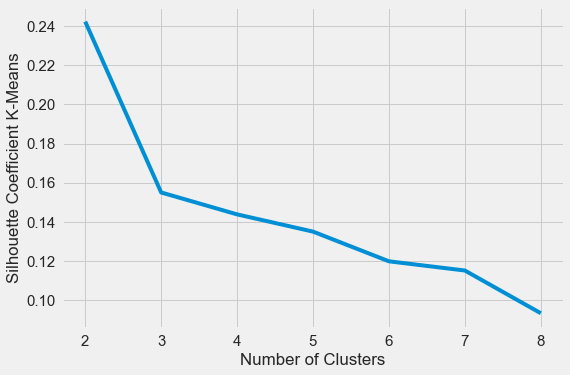

In [117]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 15,
    "random_state": 42,
}

silhouette_coeff_kmeans = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df3)
    score3 = silhouette_score(df3, kmeans.labels_)
    silhouette_coeff_kmeans.append(score3)
    print('Silhouetter Score for %.f: %.3f' %(k,score3))
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 9), silhouette_coeff_kmeans)
plt.xticks(range(2, 9))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient K-Means")
plt.show()

### 5.2 Davies-Bouldin (DB) Score

DB Score for 2: 1.501
DB Score for 3: 1.854
DB Score for 4: 1.829
DB Score for 5: 1.913
DB Score for 6: 2.107
DB Score for 7: 2.157
DB Score for 8: 2.331


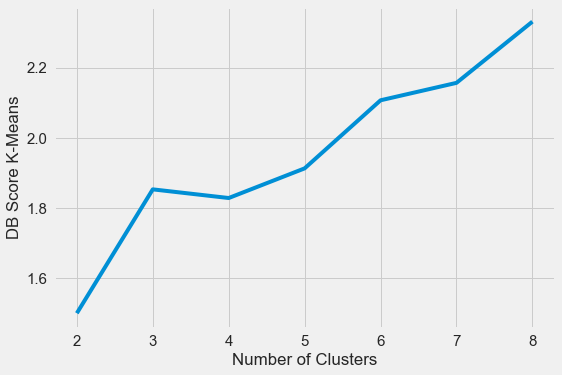

In [118]:
from sklearn.metrics import davies_bouldin_score
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 15,
    "random_state": 42,
}

db_score_kmeans = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df3)
    score3 = davies_bouldin_score(df3, kmeans.labels_)
    db_score_kmeans.append(score3)
    print('DB Score for %.f: %.3f' %(k,score3))
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 9), db_score_kmeans)
plt.xticks(range(2, 9))
plt.xlabel("Number of Clusters")
plt.ylabel("DB Score K-Means")
plt.show()

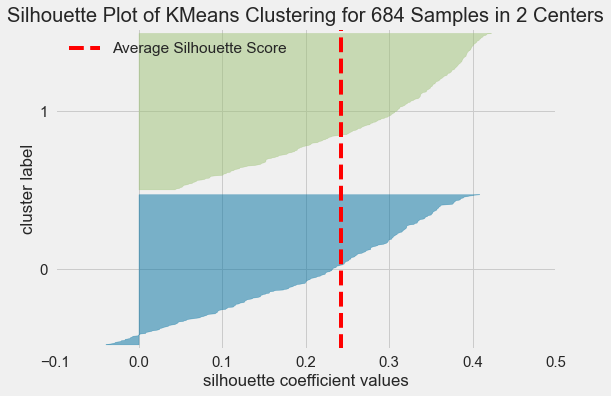

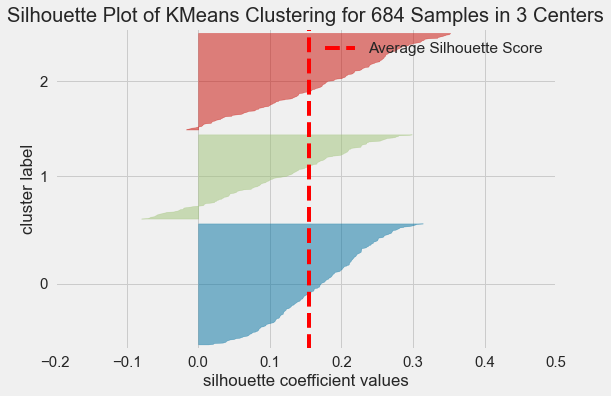

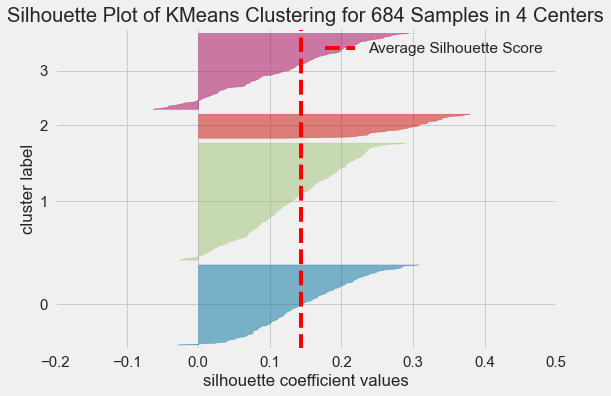

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 684 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [119]:
model_kmeans_2 = KMeans(n_clusters=2,init='k-means++',max_iter=500,n_init=10,random_state=42)
visualizer_kmeans_2 = SilhouetteVisualizer(model_kmeans_2, colors='yellowbrick')

model_kmeans_3 = KMeans(n_clusters=3,init='k-means++',max_iter=500,n_init=10,random_state=42)
visualizer_kmeans_3 = SilhouetteVisualizer(model_kmeans_3, colors='yellowbrick')

model_kmeans_4 = KMeans(n_clusters=4,init='k-means++',max_iter=500,n_init=10,random_state=42)
visualizer_kmeans_4 = SilhouetteVisualizer(model_kmeans_4, colors='yellowbrick')

# Fit the data to the visualizer
visualizer_kmeans_2.fit(df3)
visualizer_kmeans_2.show()
# Finalize and render the figure
visualizer_kmeans_3.fit(df3)
visualizer_kmeans_3.show()
# Finalize and render the figure
visualizer_kmeans_4.fit(df3)
visualizer_kmeans_4.show()

### 5.2 Within Cluster Analysis

In [120]:
#Append the cluster results into the dataframe
df2['cluster_kmeans_2']=pd.Series(cluster_kmeans_2,index=df2.index)
df2['cluster_kmeans_3']=pd.Series(cluster_kmeans_3,index=df2.index)

In [121]:
# converting some of the columns to float64 for scaling purpose
df2[s] = df2[s].replace(",","",regex=True).astype('float')

In [124]:
writer2=pd.ExcelWriter(r'C:\Users\willy\Desktop\Education\Master - Data Science (UM)\Sem3\WQD_7002_Data_Science_Research_Project\Data\data_result.xlsx')
df2.to_excel(writer2,sheet_name='df2', index = True)
writer2.save()